# Model Tuning - Model Doğrulama

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

pls_model = PLSRegression(n_components = 2)

pls_model.fit(X_train, y_train)

y_pred_train = pls_model.predict(X_train)

y_pred_test = pls_model.predict(X_test)

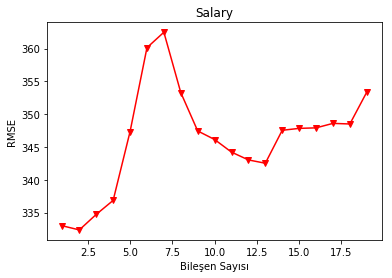

In [12]:
# CV
cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)

# Hata hesaplamak için döngü
RMSE = []
for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components = i)
    scoreSquare = cross_val_score(pls, X_train, y_train, cv = cv_10, scoring = "neg_mean_squared_error").mean()
    score = np.sqrt(-1 * scoreSquare)
    RMSE.append(score)
    
# Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), "-v", c = "r")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Salary");
# iki bileşen sayısının optimum en düşük hatayı vereceğini görmüş olduk.

In [13]:
pls_model_train_final = PLSRegression(n_components = 2).fit(X_train, y_train)

y_pred_train_final = pls_model_train_final.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test, y_pred_train_final))

398.09956327448526